# Statistik-Labor Testat Aufgabe 1
***Hinweise:***
- Bitte überprüfen Sie Ihre Resultate vor der Abgabe Ihre Ergebnisse mit den Teilergebnissen aus der Datei ***Teilergebnisse_xy.txt***. In der Datei bekommen Sie jeweils die ersten beiden Nachkommastellen des Durchschnittsalters.
- Die Unterlagen sind im **pdf-Format** in Moodle hochgeladen abzugeben. Richtige Lösungen werden nicht mehr an Sie zurückgegeben. Eine Abgabe per Email ist nicht möglich.
- Bitte füllen Sie das jeweilige **Deckblatt** mit aus und geben es mit Ihrer Lösung zusammen ab.

***Aufgabenstellung:***<br>
Sie sollen für die Personalabteilung der NANUAG die Altersverteilung der Beschäftigten analysieren. <br>
In der Datei **sr_aufg_1_xy.txt** im Unterverzeichnis **Endziffer_xy** (*„xy“ steht für die beiden Endziffern Ihrer Matrikelnummer*) finden Sie die dafür erforderlichen Daten. <br>
Diese Datei enthält folgende fünf Felder, die durch Semikolons getrennt sind: Personalnummer, Anrede („Herr“ oder „Frau“), Vorname, Nachname, Geburtsdatum.

## 1. Daten einlesen
Lesen Sie Daten in **Python** bzw. ein **Jupyter Notebook** ein. Speichern Sie sie in einem **Pandas DataFrame** ab.

***Tipp:*** Bitte beachten Sie bei der Abgabe, dass Sie auf keinen Fall die Liste mit den 100 Datensätzen ausgeben! Verwenden Sie dafür zum Beispiel die `dataframe.head(x)`-Funktion.

In [15]:
import pandas
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#ToDo: 1. Ersetzen Sie im Dateinamen xy durch entsprechende Matrikelnummer
#      2. Lassen Sie sich alle Daten anzeigen, um "fehlerhafte" Daten zu erkennen

data = pd.read_csv('datasets/sr_aufg_1_13.txt', sep=';', 
            encoding='unicode_escape', na_values='.', header = None, 
            names=['Pers.Nr.', 'Anrede', 'Vorname', 'Nachname', 'Geburtsdatum'])

#use "Pers.Nr." as index
data.set_index('Pers.Nr.', inplace=True)
data


,Anrede,Vorname,Nachname,Geburtsdatum
Pers.Nr.,,,,
1,Herr,Martin,Zimmermann,11.10.1702
2,Frau,Felicitas,Schmidt,08.02.1946
3,Frau,Marie,Fuchs,19.04.1952
4,Herr,Uwe,Kraft,23.02.1967
5,Herr,Stefan,Vogt,17.07.1964
...,...,...,...,...
108,Herr,Michael,Kleber,18.01.1970
109,Herr,Andreas,Fischer,28.10.
110,Herr,Philipp,Bischoff,am 19. April 1968


## 2. Daten bereinigen
Führen Sie eine Datenbereinigung durch. <br>
Listen Sie in einer Tabelle auf, welche (Daten-)Sätze Sie gelöscht und welche Sätze Sie wie korrigiert haben. 

***Tipp:*** Sie können hierzu die Python Funktionen `dataframe.drop()` und `dataframe.at()` verwenden. <br>
***Beispiellösung:***
![Beispiellösung](https://drive.google.com/uc?id=1z5Gydg1HzoxZLo428862fsgsKyaHKKm9)

In [16]:
#create new data frame as changelog
data_changes = pd.DataFrame(columns=['Pers.Nr.', 'Anrede', 'Vorname', 'Nachname', 'Geburtsdatum', 'Datensatz?', 'Typ des Fehlers'])
data_changes.set_index('Pers.Nr.', inplace=True)

#fill new dataframe with changes 
data_changes.loc[1] = data.loc[1]
data_changes.at[1, 'Datensatz?'] = 'Löschen'
data_changes.at[1, 'Typ des Fehlers'] = 'Datum ungültig'

data_changes.loc[2] = data.loc[9]
data_changes.at[2, 'Datensatz?'] = 'Löschen'
data_changes.at[2, 'Typ des Fehlers'] = 'Jahr 25408?'

data_changes.loc[3] = data.loc[26]
data_changes.at[3, 'Datensatz?'] = 'Löschen'
data_changes.at[3, 'Typ des Fehlers'] = 'Datum N/A'

data_changes.loc[4] = data.loc[36]
data_changes.at[4, 'Datensatz?'] = 'Korrektur'
data_changes.at[4, 'Typ des Fehlers'] = 'Eintrag falsche Spalte'

data_changes.loc[5] = data.loc[45]
data_changes.at[5, 'Datensatz?'] = 'Löschen'
data_changes.at[5, 'Typ des Fehlers'] = 'Datum N/A'

data_changes.loc[6] = data.loc[46]
data_changes.at[6, 'Datensatz?'] = 'Löschen'
data_changes.at[6, 'Typ des Fehlers'] = 'Datum N/A'

data_changes.loc[7] = data.loc[57]
data_changes.at[7, 'Datensatz?'] = 'Löschen'
data_changes.at[7, 'Typ des Fehlers'] = 'Jahr ungültig'

data_changes.loc[8] = data.loc[60]
data_changes.at[8, 'Datensatz?'] = 'Löschen'
data_changes.at[8, 'Typ des Fehlers'] = 'Datum N/A'

data_changes.loc[9] = data.loc[78]
data_changes.at[9, 'Datensatz?'] = 'Löschen'
data_changes.at[9, 'Typ des Fehlers'] = 'Datum N/A'

data_changes.loc[10] = data.loc[106]
data_changes.at[10, 'Datensatz?'] = 'Löschen'
data_changes.at[10, 'Typ des Fehlers'] = 'Jahr 2561?'

data_changes.loc[11] = data.loc[109]
data_changes.at[11, 'Datensatz?'] = 'Löschen'
data_changes.at[11, 'Typ des Fehlers'] = 'Datum N/A (Jahr fehlt)'

data_changes.loc[12] = data.loc[110]
data_changes.at[12, 'Datensatz?'] = 'Korrektur'
data_changes.at[12, 'Typ des Fehlers'] = 'Format Datum'

#correct data
data.loc[36, 'Geburtsdatum'] = data.loc[36, 'Nachname']
data.at[36, 'Vorname'] = 'Walter'
data.at[36, 'Nachname'] = 'Knecht'

data.at[110, 'Geburtsdatum'] = '19.04.1968'

#remove invalid data from original
data = data.drop([1, 9, 26, 45, 46, 57, 60, 78, 106, 109])

#reset index

#print "changelog"
data_changes





,Anrede,Vorname,Nachname,Geburtsdatum,Datensatz?,Typ des Fehlers
Pers.Nr.,,,,,,
1,Herr,Martin,Zimmermann,11.10.1702,Löschen,Datum ungültig
2,Frau,Karin,Schnell,10.03.25408,Löschen,Jahr 25408?
3,Frau,Emma,Kirchner,,Löschen,Datum N/A
4,Herr,Walter Knecht,25.02.1969,NaN,Korrektur,Eintrag falsche Spalte
5,Frau,Ingrid,Mayer,18.,Löschen,Datum N/A
6,Herr,Anton,Braun,xxxx,Löschen,Datum N/A
7,Frau,Andrea,Huber,09.07.2128,Löschen,Jahr ungültig
8,Frau,Diana,Schwab,YPTUTksyNg,Löschen,Datum N/A
9,Herr,Joachim,Weber,???,Löschen,Datum N/A


## 3. Alter bestimmen
Berechnen Sie das Alter der Beschäftigten zum Stichtag 31.12.2005. Mit „Alter“ ist hier die Anzahl der vollendeten Lebensjahre gemeint. <br>
*Beispiel:* Wer am 30.06.1975 geborgen ist, ist zum Stichtag 30 Jahre alt. <br>
(Niemand würde von sich sagen, er wäre „30,5 Jahre alt“.) Folglich wird diese Person in der Alterklasse 21 – 30 Jahre mitgezählt.

***Tipp:*** In Python ist hierzu die Pandas-Bibliothek mit ihre Funktion `pandas.to_datetime()`, sowie `pandas.year` nützlich.

In [17]:
data['Geburtsdatum'] = pd.to_datetime(data['Geburtsdatum'], format='%d.%m.%Y')

#calculate age until 31.12.2005 and insert in original DataFrame
reference_date = pd.to_datetime('2005-12-31')
data['Alter'] = (reference_date.year - data['Geburtsdatum'].dt.year).astype(int)


## 4. Säulendiagramm mit Altersverteilung
Stellen Sie die Altersverteilung der Beschäftigten in einem gruppierten Säulendiagramm dar, in dem Männer und Frauen getrennt ausgewiesen werden.<br>
Es sollen die Altersklassen bis (einschließlich) 20 Jahre, 21 – 30 Jahre, 31 – 40 Jahre, 41 – 50 Jahre und über 50 Jahre gewählt werden.

***Tipp:*** Sie benötigen hierfür die Python Bibliothek **Matplotlib** und **NumPy** sowie aus **Pandas** die Funktion `value_counts()`. <br>
***Beispiellösung:***
<div>
<img src="https://drive.google.com/uc?id=1f7Vz3JuSa958w8-dBTnPSI24hJxWa17F" width="300"/>
</div>

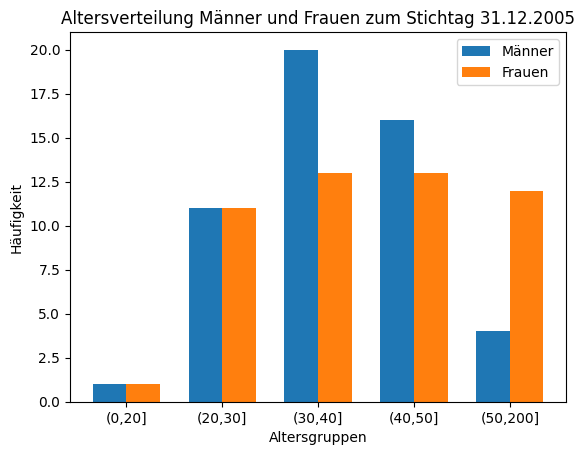

In [18]:
import matplotlib.pyplot as plt
import numpy as np

#defining age_groups
bins = [0, 21, 31, 41, 51, np.inf]
labels = ['(0,20]', '(20,30]', '(30,40]', '(40,50]', '(50,200]']

data['Altersgruppe'] = pd.cut(data['Alter'], bins=bins, labels=labels, right=False)

#count frequency of each age group by gender
age_groups_male = pd.value_counts(data[data['Anrede'] == 'Herr']['Altersgruppe'], sort=False).fillna(0)
age_groups_female = pd.value_counts(data[data['Anrede'] == 'Frau']['Altersgruppe'], sort=False).fillna(0)

# Plotting
bar_width = 0.35
index = np.arange(len(labels))

plt.bar(index, age_groups_male, bar_width, label='Männer')
plt.bar(index + bar_width, age_groups_female, bar_width, label='Frauen')

plt.xlabel('Altersgruppen')
plt.ylabel('Häufigkeit')
plt.title('Altersverteilung Männer und Frauen zum Stichtag 31.12.2005')
plt.xticks(index + bar_width / 2, labels)
plt.legend()

plt.show()


## 5. Kreis-/Tortendiagramm der Altersverteilung
Stellen Sie die Altersverteilung der männlichen Beschäftigten und der weiblichen Beschäftigten in je einem Kreisdiagramm („Tortendiagramm“) dar. <br>
Die Kreissektoren sind mit den zugehörigen Prozentzahlen zu beschriften. 

***Beispiellösung:***
<div>
<img src="https://drive.google.com/uc?id=17Z5Z8OgKw3DE4U_vD3axd7vhkkkD-N9m" width="300"/>
</div>

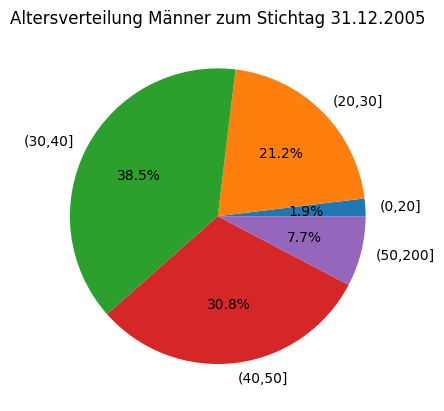

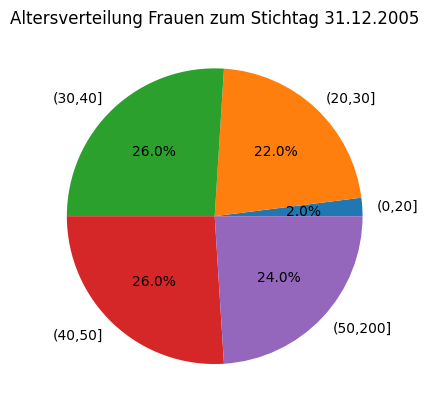

In [19]:
age_groups = pd.value_counts(data['Altersgruppe'], sort=False).fillna(0)

# Calculate percentages
total_count_male = age_groups_male.sum()
percentages_male = age_groups_male / total_count_male * 100

total_count_female = age_groups_female.sum()
percentages_female = age_groups_female / total_count_male * 100

#plotting
plt.pie(percentages_male, labels=labels, autopct='%1.1f%%')
plt.title('Altersverteilung Männer zum Stichtag 31.12.2005')
plt.show()

plt.pie(percentages_female, labels=labels, autopct='%1.1f%%')
plt.title('Altersverteilung Frauen zum Stichtag 31.12.2005')
plt.show()


## 6. Kennzahlen
Berechnen Sie **Mittelwert**, **empirische Varianz**, **empirische Standardabweichung**, **Median** und **Spannweite** der Alterszahlen: 
- für alle Beschäftigen und
- getrennt für Männer und Frauen.

***Beispiellösung:***
<div>
<img src="https://drive.google.com/uc?id=1adhKBVlds5OlO-9B5CClT2ybPolv5wVW" width="300"/>
</div>

In [20]:
average = data['Alter'].mean().round(decimals=4)
average_male = (data[data['Anrede'] == 'Herr']['Alter'].mean().round(decimals=4))
average_female = (data[data['Anrede'] == 'Frau']['Alter'].mean().round(decimals=4))


median = (data['Alter'].median().round(decimals=4))
median_male = (data[data['Anrede'] == 'Herr']['Alter'].median().round(decimals=4))
median_female = (data[data['Anrede'] == 'Frau']['Alter'].median().round(decimals=4))          

      
variance = data['Alter'].var().round(decimals=4)
variance_male = (data[data['Anrede'] == 'Herr']['Alter'].var().round(decimals=4))
variance_female = (data[data['Anrede'] == 'Frau']['Alter'].var().round(decimals=4))      


deviation = data['Alter'].std().round(decimals=4)
deviation_male = (data[data['Anrede'] == 'Herr']['Alter'].std().round(decimals=4))
deveation_female = (data[data['Anrede'] == 'Frau']['Alter'].std().round(decimals=4)) 


#calculate span
span = (data['Alter'].max() - data['Alter'].min())
span_male = (data[data['Anrede'] == 'Herr']['Alter'].max()) - (data[data['Anrede'] == 'Herr']['Alter'].min())
span_female = (data[data['Anrede'] == 'Frau']['Alter'].max()) - (data[data['Anrede'] == 'Frau']['Alter'].min())

#put results in a DataFrame
key_figures = {
    "": ["Mittelwert", "Median", "Varianz", "Std.-Abw.", "Spannweite"],
    "gesamt": [average, median, variance, deviation, span],
    "Männer": [average_male, median_male, variance_male, deviation_male, span_male],
    "Frauen": [average_female, median_female, variance_female, deveation_female, span_female]
}
df = pd.DataFrame(key_figures)


df






,,gesamt,Männer,Frauen
0,Mittelwert,39.1373,37.6538,40.6800
1,Median,38.0000,37.0000,40.0000
2,Varianz,120.0602,88.7014,150.3853
3,Std.-Abw.,10.9572,9.4181,12.2632
4,Spannweite,46.0000,41.0000,44.0000
